This tutorial is from https://keras.io/api/layers/core_layers/

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Input() is used to instantiate a Keras tensor.

A Keras tensor is a TensorFlow symbolic tensor object, which we augment with certain attributes that allow us to build a Keras model just by knowing the inputs and outputs of the model.

In [ ]:
tf.keras.Input(
    shape=None,
    batch_size=None,
    name=None,
    dtype=None,
    sparse=False,
    tensor=None,
    ragged=False,
    **kwargs
)


#Dense layer


In [8]:
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

#Example : https://keras.io/api/layers/core_layers/dense/ 

In [9]:
#create a 'sequential' model and add a Dense layer as the first layer 
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(32, activation='relu')) 
# Now the model will take as input arrays of shape (None, 16)  
# and output arrays of shape (None, 32).  
# Note that after the first layer, you don't need to specify  
# the size of the input anymore:
model.add(tf.keras.layers.Dense(32))
model.output_shape 

(None, 32)

#Arguments

***->units: Positive integer, dimensionality of the output space.***
***->activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).***

***->use_bias: Boolean, whether the layer uses a bias vector.***

***->kernel_initializer: Initializer for the kernel weights matrix.***

***->bias_initializer: Initializer for the bias vector.***

***->kernel_regularizer: Regularizer function applied to the kernel weights matrix.***

***->bias_regularizer: Regularizer function applied to the bias vector.***

***->activity_regularizer: Regularizer function applied to the output of the layer (its "activation").***

***->kernel_constraint: Constraint function applied to the kernel weights matrix.***
***->bias_constraint: Constraint function applied to the bias vector.***


#Activation layer : Applies an activation function to an output.

In [15]:
layer = tf.keras.layers.Activation(tf.nn.relu)
output = layer([-3.0, -1.0, 0.0, 2.0])
list(output.numpy())

[0.0, 0.0, 0.0, 2.0]

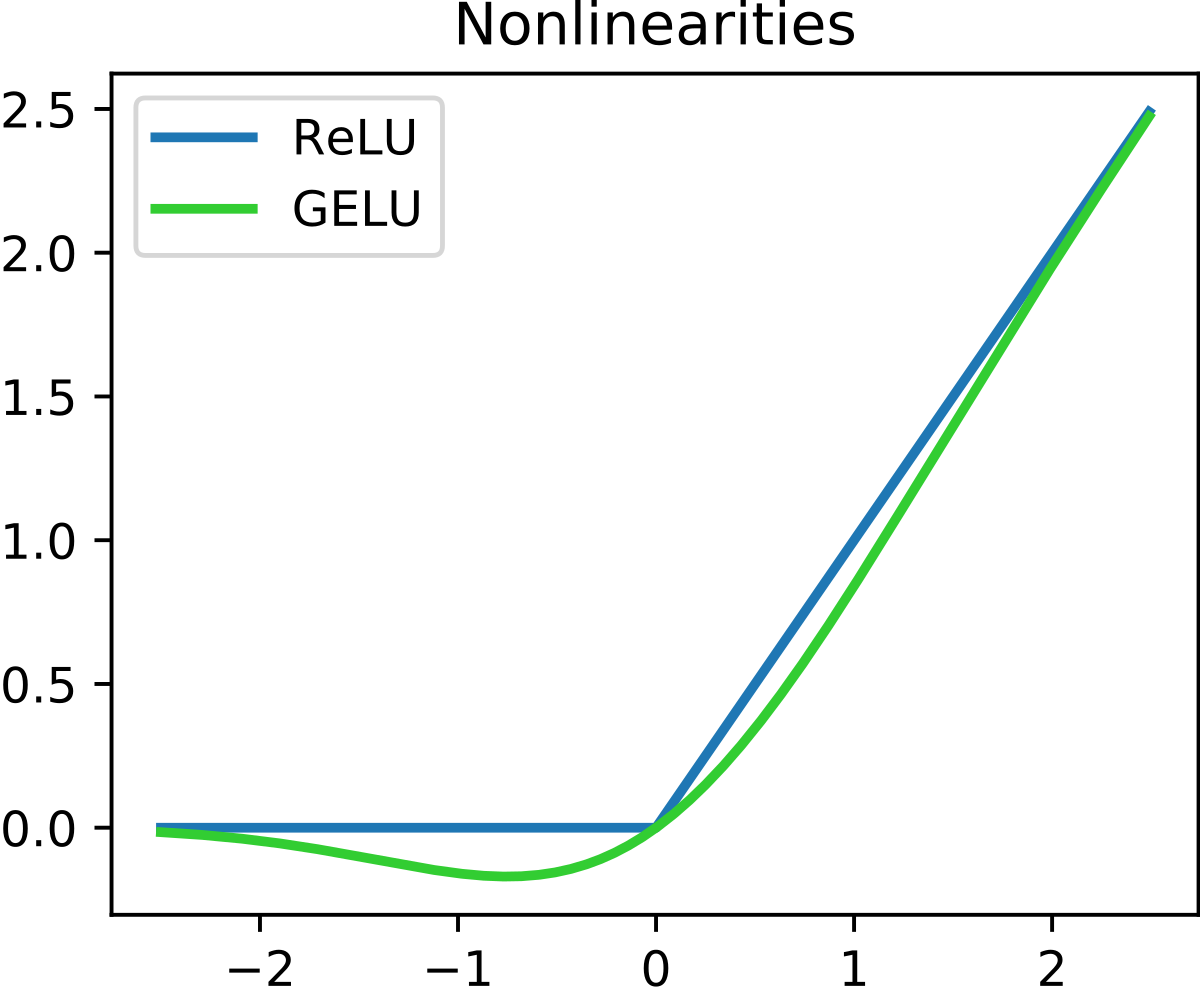

# Embedding layer : Turns positive integers (indexes) into dense vectors of fixed size. 

e.g. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

This layer can only be used as the first layer in a model.



In [29]:
import numpy as np 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
# The model will take as input an integer matrix of size (batch,  
# input_length), and the largest integer (i.e. word index) in the input  
# should be no larger than 999 (vocabulary size).
# Now model.output_shape is (None, 10, 64), where `None` is the batch dimension.  
# input_array = np.random.randint(2000, size=(32,10)) 
# it gives an error bec of 2000.
input_array = np.random.randint(1000, size=(32,10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array.shape)

print('input array dimensions -> ', input_array.shape)



(32, 10, 64)
input array dimensions ->  (32, 10)


#Arguments
-> input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.

-> output_dim: Integer. Dimension of the dense embedding.

***-> mask_zero: Boolean, whether or not the input value 0 is a special "padding" value that should be masked out. This is useful when using recurrent layers which may take variable length input. If this is True, then all subsequent layers in the model need to support masking or an exception will be raised. If mask_zero is set to True, as a consequence, index 0 cannot be used in the vocabulary (input_dim should equal size of vocabulary + 1). ***

-> input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).

# Masking layer

Masks a sequence by using a mask value to skip timesteps.

For each timestep in the input tensor (dimension #1 in the tensor), if all values in the input tensor at that timestep are equal to mask_value, then the timestep will be masked (skipped) in all downstream layers (as long as they support masking)

In [ ]:
# Example

# Consider a Numpy data array x of shape (samples, timesteps, features), 
# to be fed to an LSTM layer. You want to mask timestep #3 and #5 because you lack data for these timesteps. You can:

# Set x[:, 3, :] = 0. and x[:, 5, :] = 0.
# Insert a Masking layer with mask_value=0. before the LSTM layer:

In [30]:
samples, timesteps, features = 32, 10, 8
inputs = np.random.random([samples, timesteps, features]).astype(np.float32)
inputs[:, 3, :] = 0.
inputs[:, 5, :] = 0.
inputs

array([[[0.59591156, 0.88116795, 0.7609291 , ..., 0.11478593,
         0.9330485 , 0.3056928 ],
        [0.08451574, 0.33794594, 0.7575805 , ..., 0.70054513,
         0.03466363, 0.09094615],
        [0.99190325, 0.02921164, 0.66099215, ..., 0.56759477,
         0.48072207, 0.99193794],
        ...,
        [0.4154992 , 0.06813708, 0.7737527 , ..., 0.9355936 ,
         0.6726604 , 0.7730131 ],
        [0.7193998 , 0.6028407 , 0.39955363, ..., 0.3814417 ,
         0.82597643, 0.86964154],
        [0.8045173 , 0.48799813, 0.5330106 , ..., 0.66298765,
         0.1559711 , 0.44885594]],

       [[0.48693165, 0.658324  , 0.70402247, ..., 0.88048965,
         0.18301614, 0.6440277 ],
        [0.49439332, 0.36004102, 0.07901258, ..., 0.3553965 ,
         0.96678525, 0.18361962],
        [0.82234263, 0.67084736, 0.43819538, ..., 0.70725137,
         0.20798983, 0.5685851 ],
        ...,
        [0.35754246, 0.3730987 , 0.5555194 , ..., 0.24716671,
         0.2728555 , 0.03200306],
        [0.8

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Masking(mask_value=0.,
                                  input_shape=(timesteps, features)))
model.add(tf.keras.layers.LSTM(32))

output = model(inputs)
# The time step 3 and 5 will be skipped from LSTM calculation.
output

<tf.Tensor: shape=(32, 32), dtype=float32, numpy=
array([[-0.18955871,  0.12734349, -0.07593946, ..., -0.06956165,
        -0.2630131 ,  0.11908954],
       [-0.1654792 ,  0.12348639, -0.1102455 , ..., -0.12077325,
        -0.24189365,  0.18053201],
       [-0.2271414 ,  0.1432215 , -0.05458968, ..., -0.08862986,
        -0.28669575,  0.12599826],
       ...,
       [-0.18628265,  0.16464733, -0.18464929, ..., -0.06525225,
        -0.23196574,  0.20036514],
       [-0.1717564 ,  0.13177858, -0.10336638, ..., -0.09505646,
        -0.24371621,  0.12370992],
       [-0.23107548,  0.14572197, -0.1209733 , ..., -0.02814048,
        -0.1969112 ,  0.16793513]], dtype=float32)>